In [22]:
import zipfile
import os


with zipfile.ZipFile("/content/GPUPy.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [23]:
os.listdir("/content/")

import sys
sys.path.append("/content")

In [44]:
import numpy as np
import time
from GPUPy.src.numerical_methods.interpolation import linear_interpolation, spline_interpolation

def benchmark_interpolation(N=10000, use_gpu=True):
    # Veri seti oluştur
    x = np.linspace(0, 100, N)
    y = np.sin(x)
    x_new = np.linspace(0, 100, N * 2)  # Daha fazla nokta için ara değerler

    print(f"\n--- Benchmark for N = {N} points ---")

    # Linear Interpolation - CPU
    start = time.time()
    y_cpu_lin = linear_interpolation(x, y, x_new, use_gpu=False)
    cpu_lin_time = time.time() - start
    print(f"Linear Interpolation (CPU): {cpu_lin_time:.6f} seconds")

    # Linear Interpolation - GPU
    start = time.time()
    y_gpu_lin = gpu_linear_interpolation(x, y, x_new)
    gpu_lin_time = time.time() - start
    print(f"Linear Interpolation (GPU): {gpu_lin_time:.6f} seconds")

    # Spline Interpolation - CPU
    start = time.time()
    y_cpu_spline = spline_interpolation(x, y, x_new, bc_type='natural', use_gpu=False)
    cpu_spline_time = time.time() - start
    print(f"Cubic Spline Interpolation (CPU): {cpu_spline_time:.6f} seconds")

    # Spline Interpolation - GPU
    start = time.time()
    y_gpu_spline = gpu_cubic_spline_interpolation(x, y, x_new)
    gpu_spline_time = time.time() - start
    print(f"Cubic Spline Interpolation (GPU): {gpu_spline_time:.6f} seconds")

if __name__ == "__main__":
    benchmark_interpolation(N=10000, use_gpu=True)



--- Benchmark for N = 10000 points ---
Linear Interpolation (CPU): 0.001688 seconds
Linear Interpolation (GPU): 0.001802 seconds
Cubic Spline Interpolation (CPU): 0.001647 seconds
Cubic Spline Interpolation (GPU): 17.750702 seconds


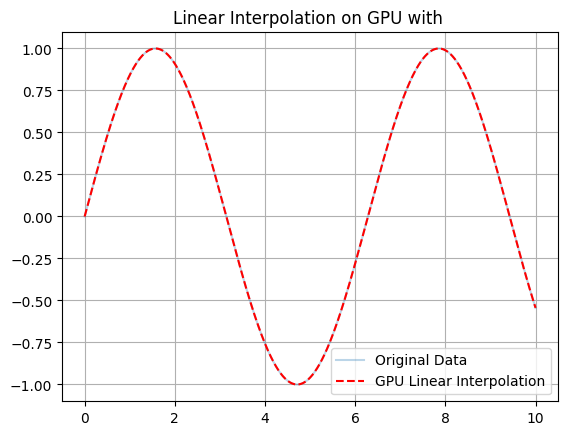

In [41]:
# Generate sample data
x = np.linspace(0, 10, 10000)
y = np.sin(x)
x_new = np.linspace(0, 10, 1000)

# Perform interpolation on GPU
y_interp_gpu = gpu_linear_interpolation(x, y, x_new)

# Bring result back to CPU
y_interp_cpu = cp.asnumpy(y_interp_gpu)

# Plot
plt.plot(x, y, label='Original Data', alpha=0.3)
plt.plot(x_new, y_interp_cpu, 'r--', label='GPU Linear Interpolation')
plt.legend()
plt.grid(True)
plt.title("Linear Interpolation on GPU with ")
plt.show()


usage: colab_kernel_launcher.py [-h] [--sizes SIZES] [--runs RUNS] [--no-plot]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-ba3a3492-1b78-4f56-abd2-6a6f16fb6722.json


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
